## FORD GO BIKE DATA EXPLORATION - 

### Introduction

### About the Data
- The data was provided by Udacity for its nanodegree program - Data Analyst. The goal is to analyze it to understand the nature of rides and offer insights into the customer behavior.

### Data Wrangling.

In [62]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from dateutil import parser

### Initial Inspection

In [2]:
#Importing the data set
bike=pd.read_csv('fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10,2019-03-01 8:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:22,2019-03-01 6:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13,2019-03-01 5:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26,2019-03-01 4:02:37,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:19,2019-03-01 0:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Inspecting the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [38]:
print(bike.columns)

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')


In [4]:
bike.shape

(183412, 16)

In [5]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453705,3.000000,37.317298,-122.453705,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### First Observation
The data has 183412 rows and has the followinf columns.
- 'duration_sec', 
- 'start_time',   
- 'end_time',     
- 'start_station_id', 
- 'start_station_name',  
- 'start_station_latitude',
- 'start_station_longitude', 
- 'end_station_id', 
- 'end_station_name',
- 'end_station_latitude',
- 'end_station_longitude', 
- 'bike_id', 'user_type',
- 'member_birth_year', 
- 'member_gender', 
- 'bike_share_for_all_trip'

### Topics of Interest.
I would like to answer the following questions.
- What staions were the busiest?
- When is the busiest time of the day for trip bookings.?  How does it differ based on gender?
- What days do people like to travel the most?
- Age and gender demographics of renters.
- Number of subscribers vs number of custmomers
- Correlation between Age and start time.

### Data Cleaning
- For sake of analysis, I will create new columns for start date, end date, start time, end time, start day and end day
- I will change the data type of columns start time and end time to datetime
- I will drop the missing data

In [7]:
#Copying the data first
df=bike.copy()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10,2019-03-01 8:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:22,2019-03-01 6:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13,2019-03-01 5:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26,2019-03-01 4:02:37,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:19,2019-03-01 0:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
#Changing the data type to datetime
df[['start_time','end_time']]=df[['start_time','end_time']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
# Creating the new columns for start_date, end_date, start_hour, end_hour, start_day, end_day
df['start_date']=df['start_time'].apply(lambda x: x.date())
df['end_date']=df['end_time'].apply(lambda x: x.date())
df['start_day']=df['start_time'].apply(lambda x: x.day_name())
df['end_day']=df['end_time'].apply(lambda x: x.day_name())
df['start_hour']=df['start_time'].apply(lambda x: x.hour)
df['end_hour']=df['end_time'].apply(lambda x: x.hour)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_day,end_day,start_hour,end_hour
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday,17,8
1,42521,2019-02-28 18:53:22,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,2019-02-28,2019-03-01,Thursday,Friday,18,6
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday,12,5
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:37,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,Thursday,Friday,17,4
4,1585,2019-02-28 23:54:19,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,Thursday,Friday,23,0


In [10]:
#We will drop the missing data
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(183412, 22)
(174952, 22)


In [11]:
#Lets create a new column 'period' to analyze if the start time fell in morning, afternoon, evening or night.
df['period']='morning'
df['period'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_day,end_day,start_hour,end_hour,period
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday,17,8,afternoon
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday,12,5,afternoon
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:37,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,2019-02-28,2019-03-01,Thursday,Friday,17,4,afternoon
4,1585,2019-02-28 23:54:19,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,2019-02-28,2019-03-01,Thursday,Friday,23,0,night
5,1793,2019-02-28 23:49:59,2019-03-01 00:19:52,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday,23,0,night


In [12]:
#Lets also create an age column for the analysis
df['age']=2019-df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,end_date,start_day,end_day,start_hour,end_hour,period,age
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28,2019-03-01,Thursday,Friday,17,8,afternoon,35.0
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28,2019-03-01,Thursday,Friday,12,5,afternoon,47.0
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:37,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28,2019-03-01,Thursday,Friday,17,4,afternoon,30.0
4,1585,2019-02-28 23:54:19,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28,2019-03-01,Thursday,Friday,23,0,night,45.0
5,1793,2019-02-28 23:49:59,2019-03-01 00:19:52,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,2019-02-28,2019-03-01,Thursday,Friday,23,0,night,60.0


In [13]:
#converting age column into int
df['age']=df['age'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,end_date,start_day,end_day,start_hour,end_hour,period,age
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:56,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28,2019-03-01,Thursday,Friday,17,8,afternoon,35
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28,2019-03-01,Thursday,Friday,12,5,afternoon,47
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:37,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28,2019-03-01,Thursday,Friday,17,4,afternoon,30
4,1585,2019-02-28 23:54:19,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28,2019-03-01,Thursday,Friday,23,0,night,45
5,1793,2019-02-28 23:49:59,2019-03-01 00:19:52,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,2019-02-28,2019-03-01,Thursday,Friday,23,0,night,60


In [15]:
#Lets check the age column to know if theres an incorrect data
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [16]:
# Since the max age shown is 141, which is highly unlikely, we will eliminate all the rows where age is > 80 to make it more realistic
df.drop(list(df[df.age>80].index),inplace=True)
df.shape

(174760, 24)

### Exploratory Analysis

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_sec,174760.0,704.309630,1643.031657,61.000000,323.000000,511.000000,789.000000,84548.000000
start_station_id,174760.0,139.021172,111.649138,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,174760.0,37.771202,0.100442,37.317298,37.770407,37.780787,37.797320,37.880222
start_station_longitude,174760.0,-122.351719,0.117775,-122.453705,-122.411901,-122.398279,-122.283093,-121.874119
end_station_id,174760.0,136.641217,111.350577,3.000000,44.000000,101.000000,238.000000,398.000000
end_station_latitude,174760.0,37.771398,0.100346,37.317298,37.770407,37.781010,37.797673,37.880222
end_station_longitude,174760.0,-122.351295,0.117338,-122.453705,-122.411647,-122.397437,-122.285633,-121.874119
bike_id,174760.0,4482.333749,1659.222583,11.000000,3799.000000,4960.000000,5505.000000,6645.000000
member_birth_year,174760.0,1984.874777,9.877739,1939.000000,1980.000000,1987.000000,1992.000000,2001.000000
start_hour,174760.0,13.456277,4.735500,0.000000,9.000000,14.000000,17.000000,23.000000


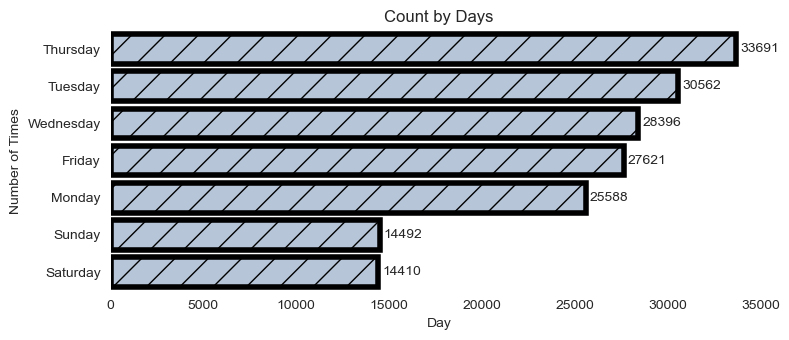

In [18]:
# What day is the most travelled day
plt.rcParams["figure.figsize"] = [8.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style('white')
ax=sns.countplot(y='start_day', data=df, color='lightsteelblue', order=df['start_day'].value_counts().index, lw=4,ec='black',hatch='/')
ax.bar_label(ax.containers[0],padding=3)
sns.despine(left=True, bottom=True)
plt.xlabel('Day')
plt.ylabel('Number of Times')
plt.title('Count by Days') 
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age distribution')

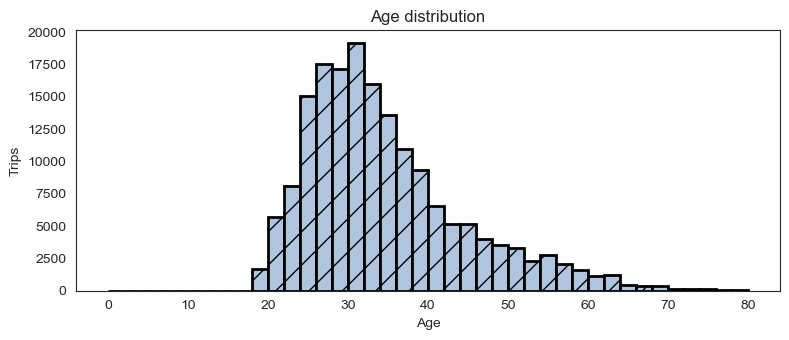

In [19]:
#Age Distribution
bins = np.arange(0, df['age'].max()+2, 2)
plt.hist(data=df[(df['age']>17) & df['age']<100] , x='age', bins=bins, color='lightsteelblue',ec='black',lw=2,hatch='/',)
plt.xlabel('Age')
plt.ylabel('Trips')
plt.title('Age distribution')

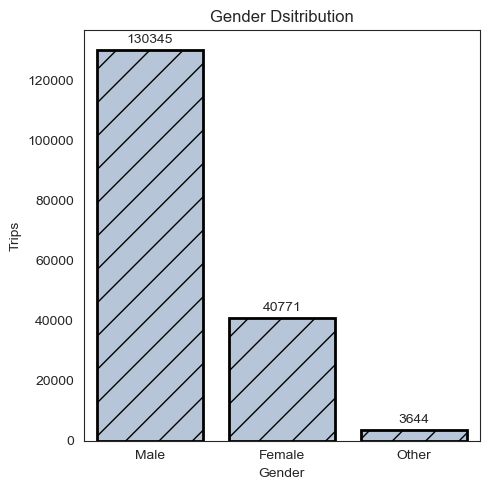

In [20]:
#Gender Data
plt.figure(figsize=(5,5))
gen_ord=df['member_gender'].value_counts().index
ax=sns.countplot(data = df, x = 'member_gender', color = 'lightsteelblue', order = gen_ord, lw=2,ec='black', hatch='/')
ax.bar_label(ax.containers[0],padding=3)
plt.xlabel('Gender')
plt.ylabel('Trips')
plt.title('Gender Dsitribution') 
plt.tight_layout()
plt.show()

#### As seen above, Males form the highest number of riders as a customer

In [21]:
df['user_type'].value_counts().reset_index()

,index,user_type
0,Subscriber,158203
1,Customer,16557


#### Most of the users are subscribers.

In [22]:
print('There are {} unique start stations'.format(df['start_station_name'].nunique()))

There are 329 unique start stations


In [23]:
#Top 10 starting stations.
top_10_start=df['start_station_name'].value_counts().head(10)
top_10_start

Market St at 10th St                                         3648
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3394
Berry St at 4th St                                           2951
Montgomery St BART Station (Market St at 2nd St)             2709
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2569
San Francisco Ferry Building (Harry Bridges Plaza)           2539
Howard St at Beale St                                        2216
Steuart St at Market St                                      2181
Powell St BART Station (Market St at 5th St)                 2143
Name: start_station_name, dtype: int64

In [24]:
top_10_end=df['end_station_name'].value_counts().head(10)
top_10_end

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4621
Market St at 10th St                                         3702
Montgomery St BART Station (Market St at 2nd St)             3460
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2860
Powell St BART Station (Market St at 4th St)                 2853
Berry St at 4th St                                           2770
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2152
Name: end_station_name, dtype: int64

In [25]:
#Busiest with most trips.
Busiest=(top_10_start.sort_values(axis=0,ascending = False) + top_10_end.sort_values(axis=0)).sort_values(axis=0, ascending=False).reset_index()

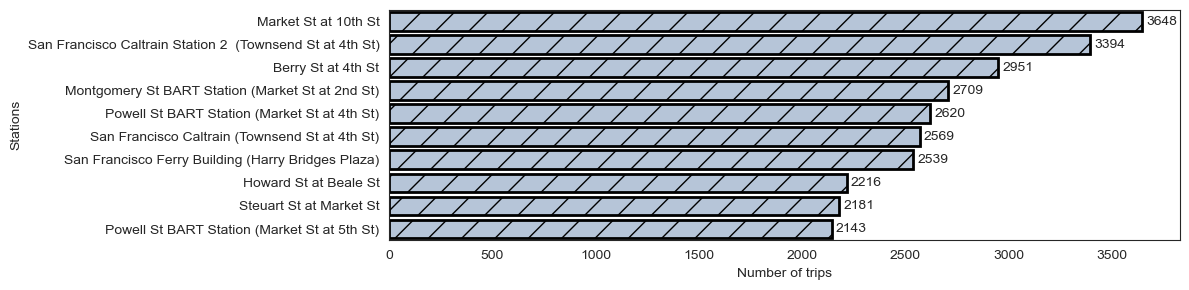

In [26]:
plt.figure(figsize=(12,3))
ax=sns.barplot(y=top_10_start.index,x=top_10_start.values, color='lightsteelblue',ec='black',lw=2,hatch='/')
ax.bar_label(ax.containers[0],padding=3)
plt.xlabel('Number of trips')
plt.ylabel('Stations')
plt.show()

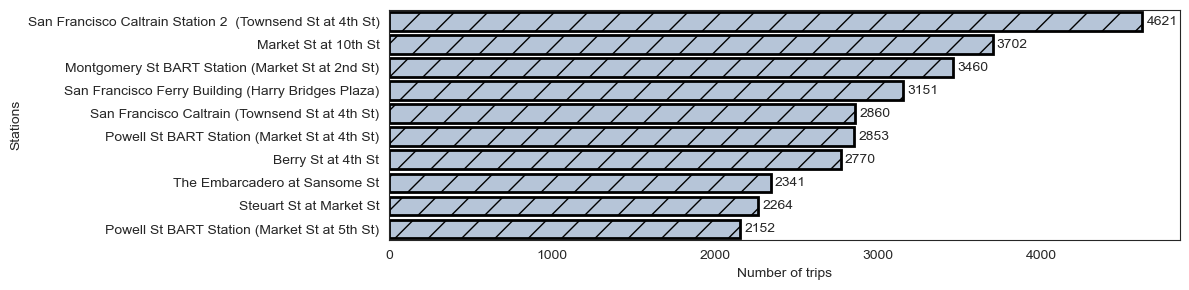

In [27]:
plt.figure(figsize=(12,3))
ax=sns.barplot(y=top_10_end.index,x=top_10_end.values, color='lightsteelblue',ec='black',lw=2,hatch='/',estimator='sum')
ax.bar_label(ax.containers[0],padding=3)
plt.xlabel('Number of trips')
plt.ylabel('Stations')
plt.show()

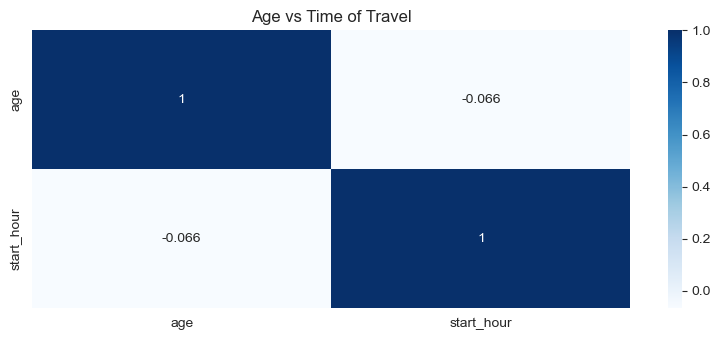

In [28]:
#Correlation between Age and time of travel
df_corr=df[['age','start_hour']].corr()
sns.heatmap(df_corr,annot=True, cmap='Blues')
plt.title('Age vs Time of Travel');

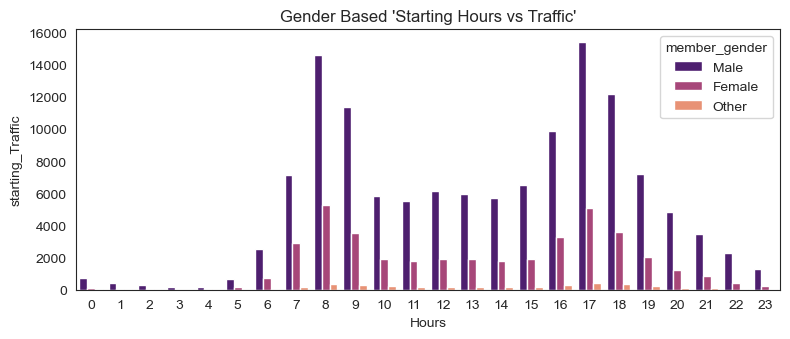

In [29]:
#Distribution of trafiic in hours
sns.countplot(data=df,x='start_hour',hue='member_gender',palette='magma',hue_order=['Male','Female','Other'])
plt.xlabel('Hours')
plt.ylabel('starting_Traffic')
plt.title("Gender Based 'Starting Hours vs Traffic'")
plt.show()

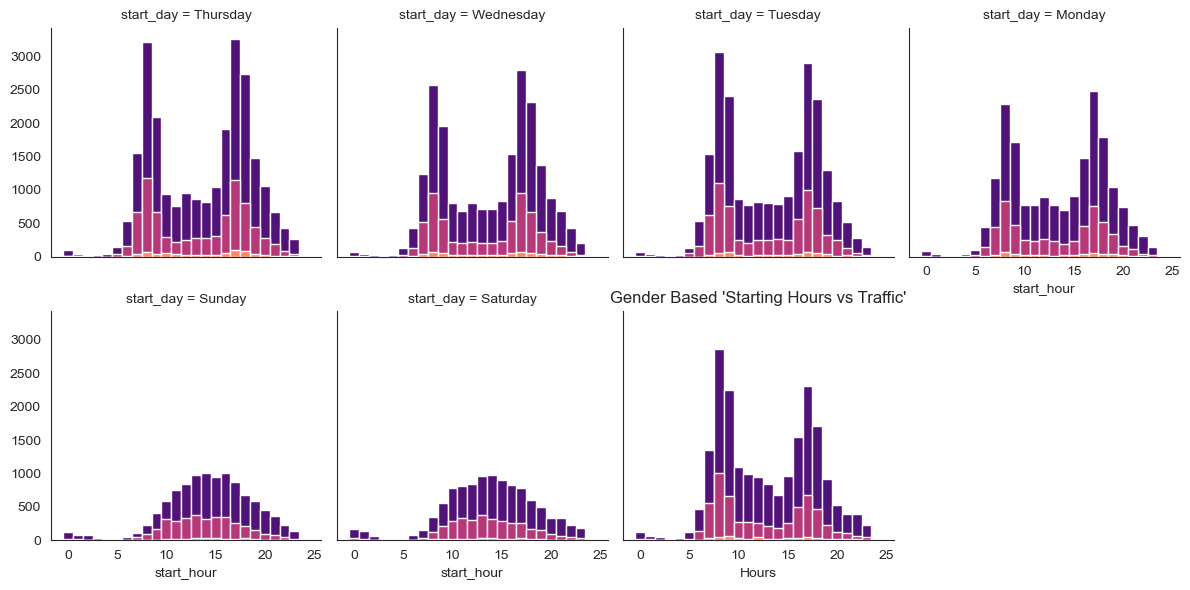

In [49]:
#Comparison of start hour data based on days.
bin_edges = np.arange(-0.5, 24.5 + 1, 1)
g = sns.FacetGrid(data=df, col="start_day", col_wrap=4, margin_titles=True,palette='magma',hue='member_gender',hue_order=['Male','Female','Other'])
g.map(plt.hist, 'start_hour', bins=bin_edges)
plt.xlabel('Hours')
plt.ylabel('starting_Traffic')
plt.title("Gender Based 'Starting Hours vs Traffic'")
plt.show();

### Conclusions
- the busiest hours include 7-9 and 4-6 when most people start their trips. But it differs on the weekends.
- San Francisco Caltrain Station 2 (Townsend St at 4th St) is the busiest staion with about 8015.0 people visitng it daily.
- Market St at 10th St is where most rides start at and San Francisco Caltrain Station 2  (Townsend St at 4th St) is where most rides end at.
- Males take more number of trips than females and others.
- Most riders are subscribers.
- Thursday has the highest numbers of rides as a starting day.
- Average age of a rider is 34 years.